# ML HW4
### 106598018 萬俊瑋

**1. In the SOFM network, the learning rate is a function of time and distance between the current node and the BMU. If η0 = σ0 = 0.1, λ = 10, find the number of required iteration such that the learning rate of nodes next to BMU is less than 0.001. A node is next to BMU is located at (x0 ± 1, y0) or (x0, y0 ±1) where (x0, y0) as the coordinate of the BMU.**

In [1]:
import numpy as np

if __name__=='__main__':
    learningRate = 1
    t = 1
    while learningRate >= 0.001:
        learningRate = 0.1*np.exp(t/10)*np.exp(-1/(2*(0.1*np.exp(-t/10))**2))
        t += 1
    print('Iteration:' + str(t - 1), learningRate)

Iteration:1 3.318986956663983e-28


![](https://github.com/wei840222/ML-HW/blob/master/images/HW4Q1.jpg?raw=true)

**2. We mentioned that the parameter α in GMM was computed based on the Lagrange multipliers. Show that αj = (1/n)∑βj(xi) as given in the PPT notes.**

[http://www.cs.nccu.edu.tw/~whliao/acv2008/08gmm.pdf](http://www.cs.nccu.edu.tw/~whliao/acv2008/08gmm.pdf)
![](https://github.com/wei840222/ML-HW/blob/master/images/HW4Q2.jpg?raw=true)

**3. We have analytically solved the following problem: Maximize f(x, y) = x + y subject to x2 + y2 = 1. Write a gradient descent program to find the solution numerically. Note that to find the maximum point, you need to follow the gradient (instead of negative gradient). Compare your numerical results with analytical results.**

In [2]:
def numericalGradient(F, X):
    h = 1e-6
    G = np.zeros_like(X)
    for i in range(len(X)):
        oriX = X[i]
        X[i] = oriX + h
        FXh1 = F(X)
        X[i] = oriX - h
        FXh2 = F(X)
        G[i] = (FXh1 - FXh2)/(2*h)
        X[i] = oriX
    return G

def gradientDescent(F, X, eta=0.1, maxEpoch=1000):
    epoch = 1
    while True:
        G = numericalGradient(F, X)
        X += eta*G
        if np.sqrt(np.sum(G**2)) < 1e-6 or epoch >= maxEpoch:
            break
        epoch += 1
    return X, epoch


if __name__=='__main__':
    def myLagrangeMutipliers(X):
        x = X[0]
        y = X[1]
        # magic number of my analytical results
        l = -1*np.sqrt(2)/2
        return x + y + l*(x**2 + y**2 - 1)
    
    X = np.random.uniform(0., 1., 3)
    X, epoch = gradientDescent(myLagrangeMutipliers, X)
    
    print('epoch:', epoch, 'The max number of f(x, y) = x + y subject to x^2 + y^2 = 1:', X[0] + X[1])

epoch: 90 The max number of f(x, y) = x + y subject to x^2 + y^2 = 1: 1.4142132497990705


![](https://github.com/wei840222/ML-HW/blob/master/images/HW4Q3.jpg?raw=true)

**4. Compute the complete update (back propagation) equations for all weights (w1 ~ w8) in the following neural networks. The activation function is sigmoid, the loss function is MSE, and the desired outputs are d1 and d2.**
![](https://github.com/wei840222/ML-HW/blob/master/images/HW4Q4NN.JPG?raw=true)

![](https://github.com/wei840222/ML-HW/blob/master/images/HW4Q4.jpg?raw=true)

**5. Write a program to implement the neural network with your back propagation equations in problem 4. To test your network, train it to distinguish the classes of versicolor and virginica in the Iris dataset using only the third and fourth features
(i.e., petal length and petal width) as the inputs. As usual, use 70% of the data for training and the rest for testing. Repeat the experiments 10 times to find the average accuracy. During training, set the desired output as 0.9 for in class data
and 0.1 for out of class data. Don’t forget to use random numbers as the initial weights.**

**numpy version**

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

class TwoLayerNN:
    def __init__(self):
        # init weight of Xavier init value
        self.W = np.random.randn(8)/np.sqrt(2)
        
    def predict(self, x1, x2):
        w1, w2, w3, w4, w5, w6, w7, w8 = self.W[0], self.W[1], self.W[2], self.W[3], self.W[4], self.W[5], self.W[6], self.W[7]
        q1 = w1*x1 + w2*x2
        q2 = w3*x1 + w4*x2
        h1 = sigmoid(q1)
        h2 = sigmoid(q2)
        z1 = w5*h1 + w6*h2
        z2 = w7*h1 + w8*h2
        y1 = sigmoid(z1)
        y2 = sigmoid(z2)
        return y1, y2
    
    def loss(self, x1, x2, d1, d2):
        y1, y2 = self.predict(x1, x2)
        return ((y1 - d1)**2 + (y2 - d2)**2)/2
    
    def gradient(self, x1, x2, d1, d2):
        w1, w2, w3, w4, w5, w6, w7, w8 = self.W[0], self.W[1], self.W[2], self.W[3], self.W[4], self.W[5], self.W[6], self.W[7]
        q1 = w1*x1 + w2*x2
        q2 = w3*x1 + w4*x2
        h1 = sigmoid(q1)
        h2 = sigmoid(q2)
        z1 = w5*h1 + w6*h2
        z2 = w7*h1 + w8*h2
        y1 = sigmoid(z1)
        y2 = sigmoid(z2)
        dw1 = (y1 - d1)*y1*(1 - y1)*w5*h1*(1 - h1)*x1 + (y2 - d2)*y2*(1 - y2)*w7*h1*(1 - h1)*x1
        dw2 = (y1 - d1)*y1*(1 - y1)*w5*h1*(1 - h1)*x2 + (y2 - d2)*y2*(1 - y2)*w7*h1*(1 - h1)*x2
        dw3 = (y1 - d1)*y1*(1 - y1)*w6*h2*(1 - h2)*x1 + (y2 - d2)*y2*(1 - y2)*w8*h2*(1 - h2)*x1
        dw4 = (y1 - d1)*y1*(1 - y1)*w6*h2*(1 - h2)*x2 + (y2 - d2)*y2*(1 - y2)*w8*h2*(1 - h2)*x2
        dw5 = (y1 - d1)*y1*(1 - y1)*h1
        dw6 = (y1 - d1)*y1*(1 - y1)*h2
        dw7 = (y2 - d2)*y2*(1 - y2)*h1
        dw8 = (y2 - d2)*y2*(1 - y2)*h2
        return np.array([dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8])
    
    def fit(self, X, D, eta = 0.01, epoch = 1000, printIvl = 100):
        loss_history, accuracy_history = list(), list()
        for i in range(epoch):
            loss_sum = 0
            for x, d in zip(X, D):
                G = self.gradient(x[0], x[1], d[0], d[1])
                self.W -= eta*G
                loss_sum += self.loss(x[0], x[1], d[0], d[1])
            loss_history.append(loss_sum/len(X))
            accuracy_history.append(self.accuracy(X, D))
            if (i+1) % printIvl == 0:
                print('epoch: ' + str(i+1) + '\tloss: ' + str(loss_history[i]) + '\taccuracy: ' + str(accuracy_history[i]))
        return loss_history, accuracy_history
    
    def accuracy(self, X, D):
        acc = 0
        for x, d in zip(X, D):
            y1, y2 = self.predict(x[0], x[1])
            y = np.argmax([y1, y2])
            d = np.argmax([d[0], d[1]])
            if y ==d:
                acc += 1
        return acc/len(X)

epoch: 200	loss: 0.08317148427266668	accuracy: 0.7857142857142857
epoch: 400	loss: 0.0739810584137047	accuracy: 0.7714285714285715
epoch: 600	loss: 0.068998922210657	accuracy: 0.7857142857142857
epoch: 800	loss: 0.06553086969918333	accuracy: 0.7857142857142857
epoch: 1000	loss: 0.0630234833571613	accuracy: 0.8
epoch: 1200	loss: 0.061096449746294884	accuracy: 0.8142857142857143
epoch: 1400	loss: 0.059536940203748945	accuracy: 0.8142857142857143
epoch: 1600	loss: 0.05822772823277232	accuracy: 0.8142857142857143
epoch: 1800	loss: 0.05710008611485758	accuracy: 0.8285714285714286
epoch: 2000	loss: 0.05611060646443453	accuracy: 0.8285714285714286


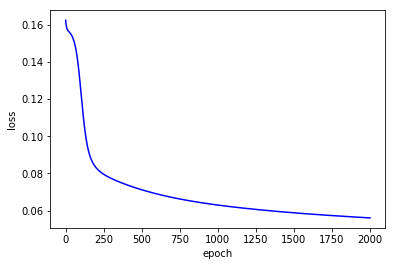

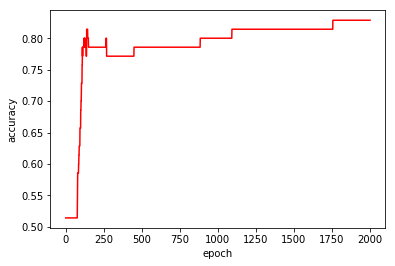


test set accuracy: 0.9333333333333333


In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

if __name__=='__main__':
    epoch = 2000
    # Make results reproducible
    seed = 8394
    np.random.seed(seed)

    # Loading the dataset
    dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    dataset = dataset[50:150]
    dataset = pd.get_dummies(dataset, columns=[4]) # One Hot Encoding
    values = list(dataset.columns.values)

    y = dataset[values[-2:]]
    y = np.array(y, dtype='float32')
    for i in range(len(y)):
        if y[i][0] == 1:
            y[i][0] = 0.9
            y[i][1] = 0.1
        else:
            y[i][0] = 0.1
            y[i][1] = 0.9
    X = dataset[values[2:4]]
    X = np.array(X, dtype='float32')

    # Shuffle Data
    indices = np.random.choice(len(X), len(X), replace=False)
    X_values = X[indices]
    y_values = y[indices]

    # Creating a Train and a Test Dataset
    test_size = 30
    X_test = X_values[-test_size:]
    X_train = X_values[:-test_size]
    y_test = y_values[-test_size:]
    y_train = y_values[:-test_size]

    NN = TwoLayerNN()
    loss, acc = NN.fit(X_train, y_train, 0.1, epoch, epoch/10)
    
    plt.plot(range(1, epoch + 1), loss, 'b-')
    plt.xlabel('epoch') 
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(range(1, epoch + 1), acc, 'r-')
    plt.xlabel('epoch') 
    plt.ylabel('accuracy')
    plt.show()
    
    print('\ntest set accuracy:', NN.accuracy(X_test, y_test))

**Tensorflow version**

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Make results reproducible
seed = 1234
np.random.seed(seed)
tf.set_random_seed(seed)

# Loading the dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset = dataset[50:150]
dataset = pd.get_dummies(dataset, columns=[4]) # One Hot Encoding
values = list(dataset.columns.values)

y = dataset[values[-2:]]
y = np.array(y, dtype='float32')
for i in range(len(y)):
    if y[i][0] == 1:
        y[i][0] = 0.9
        y[i][1] = 0.1
    else:
        y[i][0] = 0.1
        y[i][1] = 0.9
X = dataset[values[2:4]]
X = np.array(X, dtype='float32')

# Shuffle Data
indices = np.random.choice(len(X), len(X), replace=False)
X_values = X[indices]
y_values = y[indices]

# Creating a Train and a Test Dataset
test_size = 30
X_test = X_values[-test_size:]
X_train = X_values[:-test_size]
y_test = y_values[-test_size:]
y_train = y_values[:-test_size]

# Session
sess = tf.Session()

# Interval / Epochs
interval = 100
epoch = 1000

# Initialize placeholders
X_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Input neurons : 2
# Hidden neurons : 2
# Output neurons : 2
hidden_layer_nodes = 2

# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[2,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,2])) # Hidden layer -> Outputs
b2 = tf.Variable(tf.random_normal(shape=[2]))   # Second Bias

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.sigmoid(tf.add(tf.matmul(hidden_output, w2), b2))

# Cost Function
loss = tf.reduce_mean(tf.reduce_sum(tf.square(final_output - y_target), axis=0))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: y_train})
    if i % interval == 0:
        print('Epoch', i, '|', 'Loss:', sess.run(loss, feed_dict={X_data: X_train, y_target: y_train}))

# Prediction
accuracy = 0
print('\nTesting...')
for i in range(len(X_test)):
    t = np.array([0., 0.])
    t[np.argmax(y_test[i])] = 1.
    y = np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]}))[0]
    
    if t[0] == y[0] and t[1] == y[1]:
        accuracy += 1
    print('Actual:', t, 'Predicted:', y)
print('Accuracy:', accuracy/test_size)

Training the model...
Epoch 100 | Loss: 11.025841
Epoch 200 | Loss: 10.933559
Epoch 300 | Loss: 10.781759
Epoch 400 | Loss: 10.511499
Epoch 500 | Loss: 10.0211735
Epoch 600 | Loss: 9.197313
Epoch 700 | Loss: 8.043368
Epoch 800 | Loss: 6.7658076
Epoch 900 | Loss: 5.6165543
Epoch 1000 | Loss: 4.7096276

Testing...
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [1. 0.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [0. 1.] Predicted: [0. 1.]
Actual: [1. 0.] Predicted: [1. 0.]
Actual: [1. 0.] Predi